In [1]:

#Our project is based on recognizing whether there is a dog or cat in the picture. / Nasz projekt polega na rozpoznaniu, 
#czy na obrazku znajduje się pies czy kot.
#The data is taken from here: https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition


In [2]:
#Import all the main libraries we need during the project
#Importujemy wszystkie główne biblioteki, których będziemy potrzebować w projekcie

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.preprocessing.image import load_img, img_to_array

In [3]:
#loading the names of image files
#Wczytywanie nazw plików graficznych

import os

#This path shoul be changed for your own

img_dir = r'C:\Users\sofia\Desktop\Python\DATA\train'
images = os.listdir(img_dir)
images[:3]


['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg']

In [4]:
#Making full path for each of the image
#Utworzenie pełnej ścieżki dla każdego z obrazów
full_images = [os.path.join(img_dir, img) for img in images]
full_images[:3]

['C:\\Users\\sofia\\Desktop\\Python\\DATA\\train\\cat.0.jpg',
 'C:\\Users\\sofia\\Desktop\\Python\\DATA\\train\\cat.1.jpg',
 'C:\\Users\\sofia\\Desktop\\Python\\DATA\\train\\cat.10.jpg']

In [5]:
#Creating a function for showing rgb layers
#Tworzenie funkcji do pokazywania warstw rgb

def show_rgb_layers(image, subplots_args=dict()):
    
    im_shape = image.shape
    
#Checking if the loaded image has 3 dimensions
#Sprawdzanie, czy załadowany obraz ma 3 wymiary
    assert image.ndim == 3
#Checking whether the last dimension of im_shape has 3 dimensions
#Sprawdzanie, czy ostatni wymiar obrazu ma 3 wymiary
    assert im_shape[-1] == 3
    
#Plotting rgb layers
#Tworizymy wykresy wartsw rgb
    fig, ax = plt.subplots(ncols=3)
    for idx, layer in enumerate(['Reds', 'Greens', 'Blues']):
        ax[idx].imshow(image[:, :, idx], cmap=layer)
    
    return fig


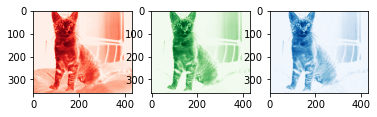

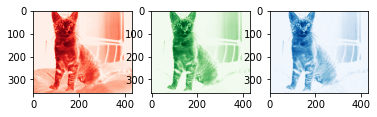

In [6]:
show_rgb_layers(img_to_array(load_img(full_images[5])))

Text(0.5, 1.0, 'cat.9980.jpg')

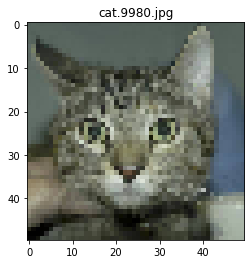

In [7]:
#Training photos are in different sizes, so we have to convert them all to the same size.
#Moreover, to save time on training we will reduce the photos to the size of 50 by 50 pixels - we use 'target size' argument here!
#Later we will load images using 'resize' argument with load_images

#Zdjęcia treningowe są w różnych rozmiarach, więc musimy je wszystkie przekonwertować do tego samego rozmiaru.
#Ponadto, aby zaoszczędzić czas na treningu, zmniejszymy zdjęcia do rozmiaru 50 na 50 pikseli.

image_index = 12479
img = load_img(full_images[image_index], target_size=(50, 50))
plt.imshow(img)
plt.title(images[image_index])

In [ ]:
#Examples of convolutions

#Loading a picture
image_index = 12856
test_image = img_to_array(load_img(full_images[image_index]))

# Let's average the RGB dimension
test_image_gr = test_image.mean(axis=2)

# We're displaying
plt.imshow(test_image_gr, cmap='gray')

# to get rid of the pixel indexes on the axes:
plt.axis('off')

In [ ]:
#Creating a first filtr 
#Tworzenie pierwszego filtra
kernel1 = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])
#Displaying a filter - we use imshow to display the matrix as an image
#Wyświetlanie filtra - używamy imshow do wyświetlenia macierzy jako obrazu
plt.imshow(kernel1)
plt.axis('off')

(-0.5, 286.5, 251.5, -0.5)

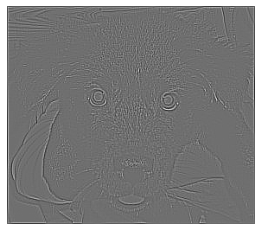

In [10]:
#We're loading the convolve2d from scipy to perform the convolution
#Potrzebujemy convolve2d z scipy, aby wykonać konwolucję
from scipy.signal import convolve2d
convolved_image1 = convolve2d(test_image_gr, kernel1)
plt.imshow(convolved_image1, cmap='gray')
plt.axis('off')



(-0.5, 2.5, 2.5, -0.5)

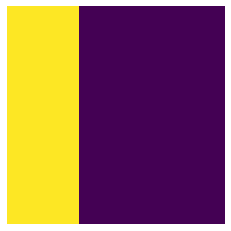

In [11]:
#Creating a second  filtr 
#Tworzenie drugiego filtra
kernel2 = np.array([[2, -1, -1],
                    [2, -1, -1],
                    [2, -1, -1]])
plt.imshow(kernel2)
plt.axis('off')

(-0.5, 286.5, 251.5, -0.5)

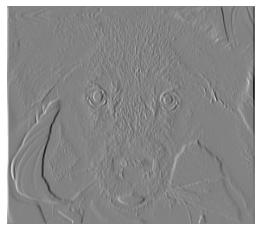

In [12]:
convolved_image2 = convolve2d(test_image_gr, kernel2)

plt.imshow(convolved_image2, cmap='gray')
plt.axis('off')

(-0.5, 3.5, 3.5, -0.5)

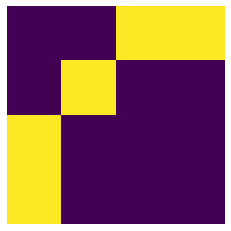

In [13]:
#Creating a third filtr
#Tworzenie trzeciego filtra
kernel3 = np.array([[-1, -1, 2, 2],
                   [-1, 2, -1, -1],
                   [2, -1, -1, -1],
                   [2, -1, -1, -1]])
plt.imshow(kernel3)
plt.axis('off')

(-0.5, 287.5, 252.5, -0.5)

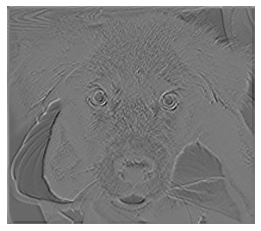

In [14]:
convolved_image3 = convolve2d(test_image_gr, kernel3)

plt.imshow(convolved_image3, cmap='gray')
plt.axis('off')

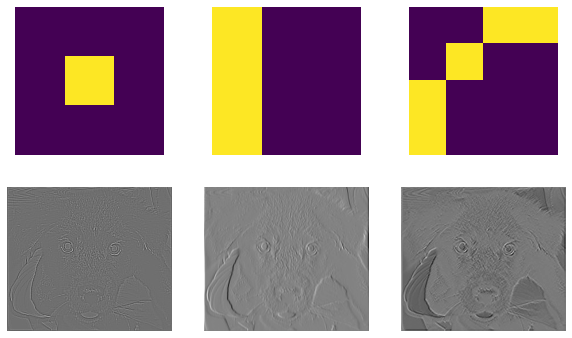

In [15]:

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))


ax[0, 0].imshow(kernel1)
ax[0, 1].imshow(kernel2)
ax[0, 2].imshow(kernel3)


ax[1, 0].imshow(convolved_image1, cmap='gray')
ax[1, 1].imshow(convolved_image2, cmap='gray')
ax[1, 2].imshow(convolved_image3, cmap='gray')

#Disabling axle markings for all panels
for a in ax.ravel():
    a.axis('off')

In [16]:
#Why convolutions are useful for image analysis? 
#We can treat individual filters as detectors of simple features - by making a convolution we find out
#what is the intensity of these features in different parts of the image.

#Dlaczego konwolucje są przydatne w analizie obrazu? 
#Poszczególne filtry możemy traktować jako detektory cech obrazów - dokonując konwolucji dowiadujemy się
#jakie jest natężenie tych cech w różnych częściach obrazu.

In [133]:
#We will load 10000 images, 5000 each per category (training on all would take too long).
#Załadujemy 10000 zdjęć, po 5000 na każdą kategorię (trening na wszystkich zająłby zbyt dużo czasu).

import sys, os
sys.path.append(r'C:\Users\sofia\Desktop\Python')
from imports_for_ML import load_images

X, y = load_images(img_dir, n_images=15000, resize=(100, 100))

**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************


In [134]:
X.shape

(15000, 100, 100, 3)

In [135]:
#For CNN-type networks we need additional layer types Conv2D, 
#MaxPooling2D and Flatten:

from keras.models import Sequential
from keras.layers import Dense

from keras.layers import Conv2D, MaxPooling2D, Flatten

from keras.models import load_model

from keras.layers import Dropout, BatchNormalization

In [136]:
#After loading, we divide the photos into training and test photos.
#Po załadowaniu dzielimy zdjęcia na treningowe i testowe.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [137]:
X_train.shape

(11250, 100, 100, 3)

In [138]:
y_train.shape

(11250,)

In [139]:
#To make the work easier we will separate 4% of the training data (i.e. 0.04 * 9000, i.e. 360 pictures)
#into an independent validation set - on this set of pictures we do not teach the network, but use it on an ongoing basis
#to monitor the correctness of the network on independent data during the training.

#Aby ułatwić pracę wydzielimy 4% danych treningowych
#do niezależnego zbioru walidacyjnego - na tym zbiorze zdjęć nie uczymy sieci, ale używamy jej na bieżąco
#do monitorowania poprawności działania sieci na niezależnych danych w trakcie treningu.

from keras.callbacks import EarlyStopping

stop_early = EarlyStopping(patience=4)

In [140]:

#My network will consist of: five hidden layers, four convolution layers and one 'dense' (all to all connection).
#The first two convolution layers will consist of 16 filters, each 3 x 3 (plus depth). The activation function for these layers
#is standard relu. Then I will add BatchNormalization after each of convoluted layer (Conv2d). After the two convolution layers we will perform a maximum pooling operation, dividing the image into segments of 3 x 3
#and for each one selecting the maximum (pool_size=(3, 3))
#then we add two more convolution layers, this time each consisting of 32 filters, each 3 x 3
#again we use max pooling, but this time we divide the data into smaller segments - 2 by 2
#at the end, we roll out the previous layer into one vector (flatten) and add a normal layer with 64 neurons
#the output layer is just one neuron (Dense type) that tells us whether or not there's a dog in the picture, with the sigmoid activation
# Dropout prevents neurons or combinations of neurons from remembering specific training examples (and, therefore, overfitting)

model = Sequential([


Conv2D(32, (4,4), activation='relu', input_shape=(100, 100, 3), kernel_initializer='he_uniform'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25), 
Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform'),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),    
BatchNormalization(),
Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform'),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),
Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform'),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),
Flatten(),
Dense(512, activation='relu', kernel_initializer='he_uniform'),
Dense(1, activation='sigmoid')

])


model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics='accuracy')

In [141]:
history = model.fit(  X_train, y_train, epochs=20, validation_split=0.04, callbacks=[stop_early]    )

Epoch 1/20
338/338 [==============================] - 76s 224ms/step - loss: 0.9371 - accuracy: 0.5730 - val_loss: 0.6469 - val_accuracy: 0.6111
Epoch 2/20
338/338 [==============================] - 75s 223ms/step - loss: 0.6187 - accuracy: 0.6568 - val_loss: 0.6271 - val_accuracy: 0.6733
Epoch 3/20
338/338 [==============================] - 76s 223ms/step - loss: 0.5879 - accuracy: 0.6907 - val_loss: 0.5938 - val_accuracy: 0.6933
Epoch 4/20
338/338 [==============================] - 76s 224ms/step - loss: 0.5577 - accuracy: 0.7195 - val_loss: 0.5823 - val_accuracy: 0.7044
Epoch 5/20
338/338 [==============================] - 75s 223ms/step - loss: 0.5230 - accuracy: 0.7412 - val_loss: 0.5426 - val_accuracy: 0.7533
Epoch 6/20
338/338 [==============================] - 75s 223ms/step - loss: 0.5023 - accuracy: 0.7642 - val_loss: 0.5112 - val_accuracy: 0.7667
Epoch 7/20
338/338 [==============================] - 75s 223ms/step - loss: 0.4656 - accuracy: 0.7832 - val_loss: 0.7553 - val_ac

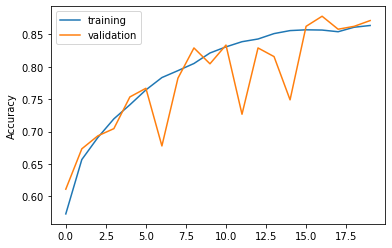

In [142]:
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.ylabel('Accuracy')
plt.legend()

In [143]:
train_corr = model.fit(X_train, y_train)

test_corr = model.fit(X_test, y_test)

118/118 [==============================] - 26s 221ms/step - loss: 0.3896 - accuracy: 0.8371


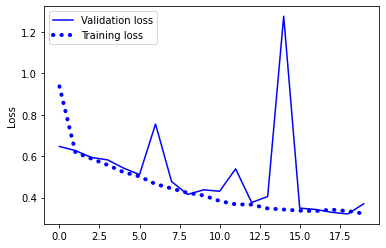

In [145]:
plt.plot(history.history['val_loss'], label='Validation loss', color='Blue')
plt.plot(history.history['loss'], label='Training loss', color='Blue', linestyle=(0, (0.1,2)), dash_capstyle='round', linewidth = 4)
plt.ylabel('Loss')
plt.legend()

In [146]:
model.evaluate(X_test, y_test)

118/118 [==============================] - 5s 40ms/step - loss: 0.4639 - accuracy: 0.7509


[0.4638783633708954, 0.7509333491325378]

In [163]:
image_index = 10566
test_image = img_to_array(load_img(full_images[image_index], target_size=(100,100)))
model.predict(test_image.reshape(1,100,100,3))

array([[0.24175185]], dtype=float32)

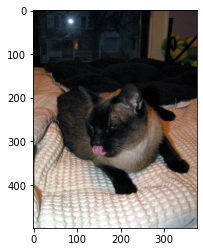

In [164]:
x = img_to_array(load_img(full_images[image_index]), dtype='uint8')
plt.imshow(x)